# Spacially optmized dtypes

## 1. Categorical features
> By using `categorical` instead of `object` - which<br>
 is infered by pandas when fetching from the UCI repo - we<br>
 can optmize memory usage by up to ~50%

In [8]:
# Libraries
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [9]:
# Fetch
df = fetch_ucirepo(id=144).data.original.rename(columns={'class': 'Target'})
memory_original = df.memory_usage().sum() / 1024
dtypes_original = df.dtypes.to_frame(name='before')


Memory reduction: 52.65%


Text(0.5, 1.0, 'Memory usage (kB)')

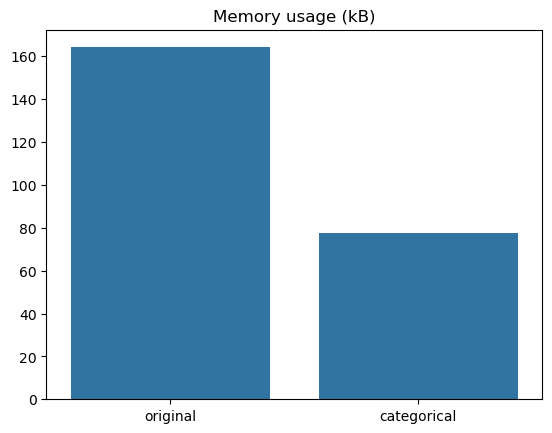

In [10]:
# 1. Change dtypes from object to category
df_cat = df.copy()
df_cat[df_cat.select_dtypes('object').columns] = df_cat.select_dtypes('object').astype('category')

# Updated memory usage
memory_cat = df_cat.memory_usage().sum() / 1024

# Memory after 1st reduction
print(f"Memory reduction: {(1 - memory_cat / memory_original) * 100:.2f}%")
sns.barplot({'original': memory_original, 'categorical': memory_cat})
plt.title('Memory usage (kB)')

## 2. Binaries
> The author chose (1...2) instead of (0...1) for the target value, attributes 19 and 20 have strings instead of binary values, thus we will:
1. Replace with (False...True) 
    - Target [1: True, 2: False](/Users/felipecampelo/dev/projects/german-credit/info/additional-variable-information.md);
    - Att19 [A191: False, A192: True]
    - Att20 [A201: True, A202: False]

2. Convert to `bool`;

In [18]:
# 2. Bool

# Replace with boolean
df_bin = df_cat.copy()
df_bin['Target'] = df_bin['Target'].map(lambda x: x == 1)
df_bin['Attribute19'] = df_bin['Attribute19'].map(lambda x: x == 'A192')
df_bin['Attribute20'] = df_bin['Attribute20'].map(lambda x: x == 'A201')

# Convert to bool dtype
df_bin[['Target', 'Attribute19', 'Attribute20']] = df_bin[['Target', 'Attribute19', 'Attribute20']].astype('bool')

# Updated memory usage
memory_bin = df_bin.memory_usage().sum() / 1024
dtypes_bin = df_bin.dtypes.to_frame(name='binary')

Memory reduction: 56.96%


Text(0.5, 1.0, 'Memory usage (kB)')

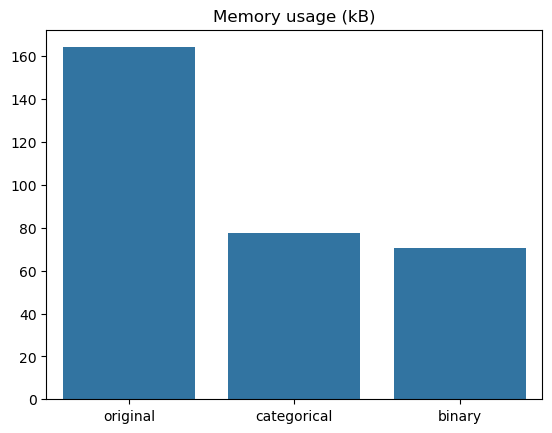

In [19]:
# Memory after 2nd reduction
print(f"Memory reduction: {(1 - memory_bin / memory_original) * 100:.2f}%")
sns.barplot({'original': memory_original, 'categorical': memory_cat, 'binary': memory_bin})
plt.title('Memory usage (kB)')

## 3. Our final Dtypes

In [20]:
# Final dtypes
pd.concat([df.dtypes.to_frame('Original'), df_cat.dtypes.to_frame('Category'), df_bin.dtypes.to_frame('Binary')], axis=1)

,Original,Category,Binary
Attribute1,object,category,category
Attribute2,int64,int64,int64
Attribute3,object,category,category
Attribute4,object,category,category
Attribute5,int64,int64,int64
Attribute6,object,category,category
Attribute7,object,category,category
Attribute8,int64,int64,int64
Attribute9,object,category,category
Attribute10,object,category,category


## 4. Preprocessing as a script

In [21]:
%%writefile ../utils/preprocess.py
import pandas as pd

def preprocess_dtypes(df):
    """
    optimize memory usage by:
    1. converting object Features to category 
    2. Target to bool

    @return: DataFrame with optimized memory usage
    """

    copy = df.copy()

    # 1. Objects to category -----------------------------------
    copy[copy.select_dtypes('object').columns] = copy.select_dtypes('object').astype('category')

    # df_bin['Target'] = df_bin['Target'].map(lambda x: x == 1)
    # df_bin['Attribute19'] = df_bin['Attribute19'].map(lambda x: x == 'A192')
    # df_bin['Attribute20'] = df_bin['Attribute20'].map(lambda x: x == 'A201')

    # # Convert to bool dtype
    # df_bin[['Target', 'Attribute19', 'Attribute20']] = df_bin[['Target', 'Attribute19', 'Attribute20']].astype('bool')

    # 2. Booleans ----------------------------------------------

    ## Rename 'class' to 'Target'
    copy = copy.rename(columns={'class': 'Target'})

    ## Replace with booleans
    copy['Target'] = copy['Target'].map(lambda x: x == 1)
    copy['Attribute19'] = copy['Attribute19'].map(lambda x: x == 'A192')
    copy['Attribute20'] = copy['Attribute20'].map(lambda x: x == 'A201')

    ## Convert dtype to bool
    copy[['Target', 'Attribute19', 'Attribute20']] = copy[['Target', 'Attribute19', 'Attribute20']].astype('bool')

    return copy


Overwriting ../utils/preprocess.py


## How a 56% reduction in spatial complexity can help us?